In [1]:
csv_path = '/home/jxm3/research/deidentification/unsupervised-deidentification/results/ablation/wandb_export_2022-06-13T08_12_37.703-04_00.csv'

In [2]:
import pandas as pd

In [55]:
df = pd.read_csv(csv_path)
df = df[[c for c in df.columns if ('__MIN' not in c and '__MAX' not in c)]]

In [58]:
import seaborn as sns

In [59]:
df[['ca__roberta__tapas - val/document_redact_adversarial_1/acc_top_k/1',  'ca__roberta__tapas__idf__dropout_-1.0_1.0_0.0__e3072__ls0.1 - val/document_redact_adversarial_1/acc_top_k/1',]]

,ca__roberta__tapas - val/document_redact_adversarial_1/acc_top_k/1,ca__roberta__tapas__idf__dropout_-1.0_1.0_0.0__e3072__ls0.1 - val/document_redact_adversarial_1/acc_top_k/1
0,0.072,0.058
1,0.147,0.177
2,0.229,0.282
3,0.218,0.286
4,0.302,0.342
...,...,...
95,0.409,0.641
96,0.411,0.641
97,0.409,0.642
98,0.410,0.638


In [111]:
df2 = df.set_index('Step').unstack()
df2 = df2.reset_index().rename(columns={'level_0': 'Experiment',  'Step': 'Step',  0: 'Value'})
rename_exp_dict = {
    'ca__roberta__tapas__dropout_-1.0_1.0_0.0__fixprof - val/document_redact_adversarial_1/acc_top_k/1': '+ Word Dropout (p~U[0,1])',
    'ca__roberta__tapas__dropout_0.5_1.0_0.0__fixprof - val/document_redact_adversarial_1/acc_top_k/1': '+ Word Dropout (p=0.5)',
    'ca__roberta__tapas__dropout_0.5_1.0_0.0__fixprof__e3072 - val/document_redact_adversarial_1/acc_top_k/1': '+ Word Dropout + Bigger embedding',
    'ca__roberta__tapas__idf__dropout_-1.0_1.0_0.0__e3072__ls0.1 - val/document_redact_adversarial_1/acc_top_k/1': 'Everything',
    'ca__roberta__tapas - val/document_redact_adversarial_1/acc_top_k/1': '+ Fine-tune profile encoder',
    'ca__roberta__tapas__fixprof__ls0.1 - val/document_redact_adversarial_1/acc_top_k/1': '+ Label Smoothing (0.1)',
    'ca__roberta__tapas__idf__dropout_-1.0_1.0_0.0__fixprof - val/document_redact_adversarial_1/acc_top_k/1': '+ Word Dropout + IDF-weighted sampling',
    'ca__roberta__tapas__fixprof - val/document_redact_adversarial_1/acc_top_k/1': 'Baseline'
}

df2['Experiment'] = df2['Experiment'].map(lambda ex: rename_exp_dict[ex])
df2

,Experiment,Step,Value
0,"+ Word Dropout (p~U[0,1])",10,0.052
1,"+ Word Dropout (p~U[0,1])",22,0.090
2,"+ Word Dropout (p~U[0,1])",34,0.111
3,"+ Word Dropout (p~U[0,1])",46,0.114
4,"+ Word Dropout (p~U[0,1])",58,0.129
...,...,...,...
795,Baseline,1161,0.180
796,Baseline,1173,0.178
797,Baseline,1185,0.178
798,Baseline,1197,0.172


In [85]:
df2['Experiment'].unique()

array(['Word Dropout (p~U[0,1])', 'Word Dropout (p=0.5)',
       'Word Dropout (p=0.5); big embedding', 'Everything',
       '+ Fine-tune encoder (Coordinate ascent)', 'Label Smoothing (0.1)',
       'Word Dropout (p~U[0,1]) + IDF-weighted sampling', 'Baseline'],
      dtype=object)

Text(0, 0.5, 'Accuracy')

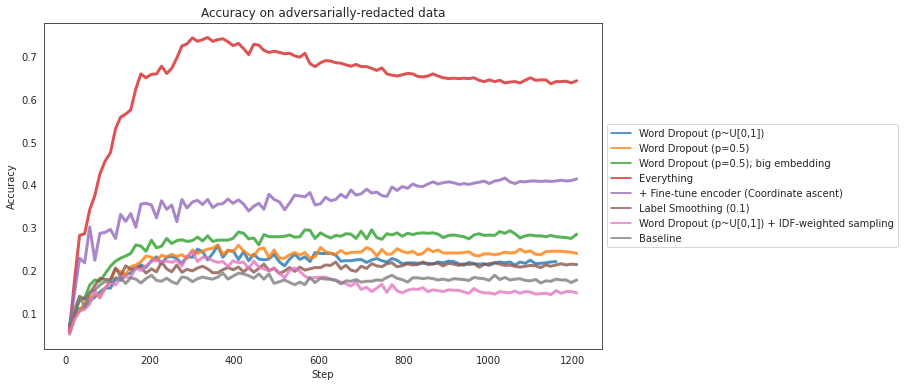

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.set_style("white")
g = sns.lineplot(x='Step', y='Value', hue='Experiment', data=df2, alpha=0.8, linewidth=3) 
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Accuracy on adversarially-redacted data')
plt.ylabel('Accuracy')

<AxesSubplot:>

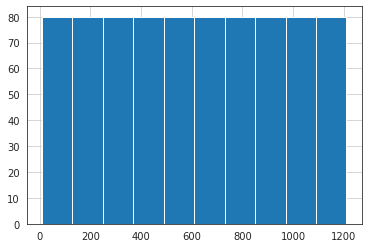

In [103]:
df2['Step'].hist()

Text(0.5, 0, 'Step')

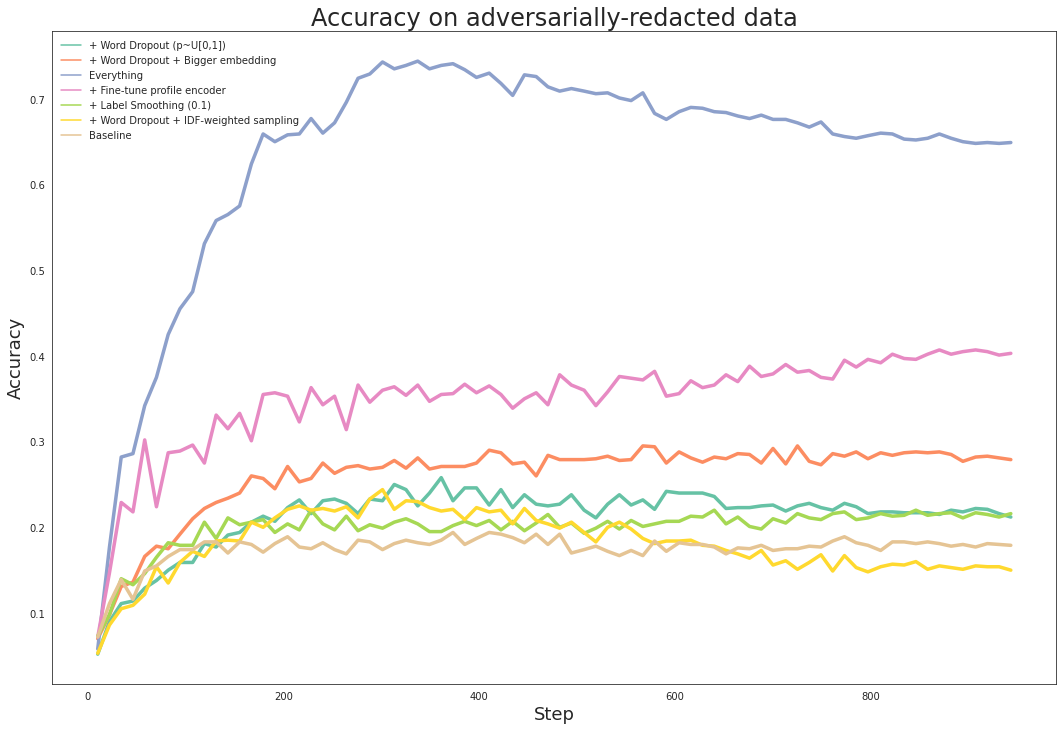

In [150]:
df3 = df2[df2['Step'] < 950]
df3 = df3[df3['Experiment'] != '+ Word Dropout (p=0.5)']

import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))

sns.set_style("white")
# sns.color_palette("pastel")

g = sns.lineplot(x='Step', y='Value', hue='Experiment', data=df3, alpha=1, linewidth=3.5, palette="Set2") 
g.legend(loc='upper left',frameon=False)

plt.title('Accuracy on adversarially-redacted data', fontsize=24)
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Step', fontsize=18)